In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

/Users/appanna/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [2]:
# import data
df=pd.read_csv('Vanilla 2020.csv')
df.head()

,Date,Location,Total points,Points flowering,New flowers,Total Flowers
0,12 Mar 20,3*2ag,8,NaN,0.0,NaN
1,12 Mar 20,3*3g,2,NaN,NaN,NaN
2,12 Mar 20,4*3a,9,NaN,1.0,NaN
3,12 Mar 20,4*2a,8,NaN,NaN,NaN
4,12 Mar 20,5*2a,1,NaN,NaN,NaN


# Data cleaning

In [3]:
df.columns=df.columns.str.replace(' ','_') #Rename columns to remove blank space
df.columns

Index(['Date', 'Location', 'Total_points', 'Points_flowering', 'New_flowers',
       'Total_Flowers'],
      dtype='object')

In [4]:
# Check date range
df1=df.copy() #make copy to preserve original dataframe
df1['Date'].unique()

array(['12 Mar 20', '13 Mar 20', '16 Mar 20', '17 Mar 20', '18 Mar 20',
       '19 Mar 20', '20 Mar 20', '21 Mar 20', '22 Mar 20', '23 Mar 20',
       '24 Mar 20', '25 Mar 20', '26 Mar 20', '27 Mar 20', '28 Mar 20',
       '29 Mar 20', '30 Mar 20', '31 Mar 20', '1 Apr 20', '2 Apr 20',
       '3 Apr 20', '4 Apr 20', '5 Apr 20', '6 Apr 20', '7 Apr 20',
       '8 Apr 20', '9 Apr 20', '10 Apr 20', '11 Apr 20', '12 Apr 20',
       '13 Apr 20'], dtype=object)

In [5]:
# From which date do we have values for 'points flowering'
#df.Date.loc[~df.Points_flowering.isnull()].iloc[0] 
df1.Date.loc[~df.Points_flowering.isnull()].unique()

array(['19 Mar 20', '20 Mar 20', '21 Mar 20', '22 Mar 20', '23 Mar 20',
       '24 Mar 20', '25 Mar 20', '26 Mar 20', '27 Mar 20', '28 Mar 20',
       '29 Mar 20', '30 Mar 20', '31 Mar 20', '1 Apr 20', '2 Apr 20',
       '3 Apr 20', '4 Apr 20', '5 Apr 20', '6 Apr 20', '7 Apr 20',
       '8 Apr 20', '9 Apr 20', '10 Apr 20', '11 Apr 20', '12 Apr 20',
       '13 Apr 20'], dtype=object)

In [6]:
# check unique locations
df1['Location'].unique()

array(['3*2ag', '3*3g', '4*3a', '4*2a', '5*2a', '5*2ag', '4*3a2g', '5*4a',
       '5*4as', '6*5a', '7*3as', '7*3a', '7*2a', '7*a', '6*2a', '7*c',
       '9*2a', '8*d', '8*3a', '8*3a2s', '10*as', '11*g', '12*g', '13*g',
       '8*4a', '8*4a2s', '12*2ag', '15*2d', '17*a', '19*d', '20*a',
       '23*3a', '10*s', '21*g', '8*4a ', '10*s ', '15*2d ', '5*2a ',
       '7*3a3s', '7*3a2s', '7*a ', '10*2a', '16*m', '5*3as', '19*2d',
       '25*3g', '19*m'], dtype=object)

In [7]:
#Check rows of 'Total_points' where there are transitions '->'
df1[df1.Total_points.str.contains('->',na=False)] # without na=false, nan values give error

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers
147,19 Mar 20,6*2a,2->1,0,0.0,NaN
349,25 Mar 20,7*3a,5->2,2,0.0,NaN
356,25 Mar 20,10*s,6->8,0,0.0,NaN
358,25 Mar 20,10*as,2->3,0,0.0,NaN
360,25 Mar 20,11*g,2->3,0,0.0,NaN
400,26 Mar 20,15*2d,1->2,1,0.0,NaN
421,27 Mar 20,8*4a2s,2->3,0,0.0,NaN
426,27 Mar 20,7*2a,1->2,1,0.0,NaN
438,27 Mar 20,15*2d,1->2,1,1.0,NaN
447,28 Mar 20,4*3a2g,11->12,0,0.0,NaN


In [8]:
#For transitions with '->' use second character
df1['Total_points']=df1['Total_points'].astype(str)#mixed float and str objects converted to uniform str column
df1['Points_flowering']=df1['Points_flowering'].astype(str)
for ind,row in df1.iterrows():
    if '->' in row['Total_points']:
        df1.loc[ind,'Total_points']=df1.loc[ind,'Total_points'].split('->')[1] # select 2nd location
    if '->' in row['Points_flowering']:
        df1.loc[ind,'Points_flowering']=df1.loc[ind,'Points_flowering'].split('->')[1] # select 2nd location

In [9]:
#Check rows of 'Total_points' where there are transitions '->'
df1[df1.Total_points.str.contains('->',na=False)] # without na=false, nan values give error

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers


In [10]:
# Create column for cumulative number of new flowers. Indicate color as number of flowering points
df1['cum_sum']=df1.groupby('Location').cumsum()
#df[df['Location']=='3*2ag'] # check with 1 location if cum_sum is working alright

# Bar chart race
    -Location must figure on the chart only after it starts flowering.
    -Points flowering data occurs only after 19th March, so filter dataframe to those.
    -Use notnull to display points which are flowering only

In [11]:
# Location must figure on the chart only after it starts flowering.
# Points flowering data occurs only after 19th March, so filter dataframe to those.
# Use notnull to display points which are flowering only
df2=df1.copy() #check point for the data
df2.reset_index(inplace=True,drop=True)
df2.set_index('Date',inplace=True)
df2.drop(['12 Mar 20', '13 Mar 20', '16 Mar 20', '17 Mar 20', '18 Mar 20'],inplace=True) #drop dates with improper null
df2.reset_index(inplace=True)
#df2

In [12]:
# replace zeroes with nan values
df2['Points_flowering'].astype(str)
df2['Points_flowering'].replace('0',np.nan,inplace=True)
df2['Points_flowering'].replace('nan',np.nan,inplace=True)
#remove location 7*c, which had only 1 flower and stopped.
df2=df2[df2['Location']!='7*c']

In [13]:
# Prepare dff from data set to be able to plot bar chart for 1 frame
current_day= '13 Apr 20'
dfpf=df2[df2['Points_flowering'].notnull()] # consider locations only once it flowers 
dff = (dfpf[dfpf['Date'].eq(current_day)]
       .sort_values(by='cum_sum', ascending=True))
#dff

<BarContainer object of 34 artists>

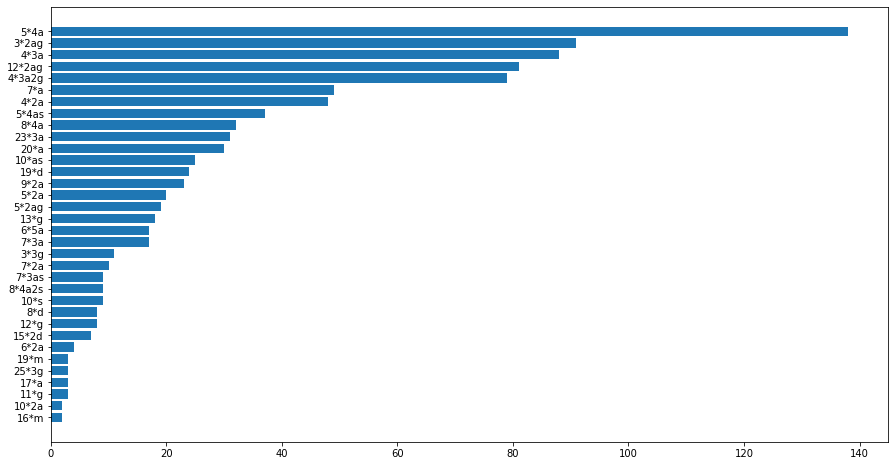

In [14]:
# Plot bar chart for 1 frame
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Location'], dff['cum_sum'])

In [15]:
colors = dict(zip(
    ['1', '2', '3', '4','5', '6', '7','8','9','10','11','12','13'],
    ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1','#2874A6', '#76D7C4',
     '#48C9B0','#1ABC9C','#17A589','#148F77','#BB8FCE','#A569BD','#8E44AD']
    ))

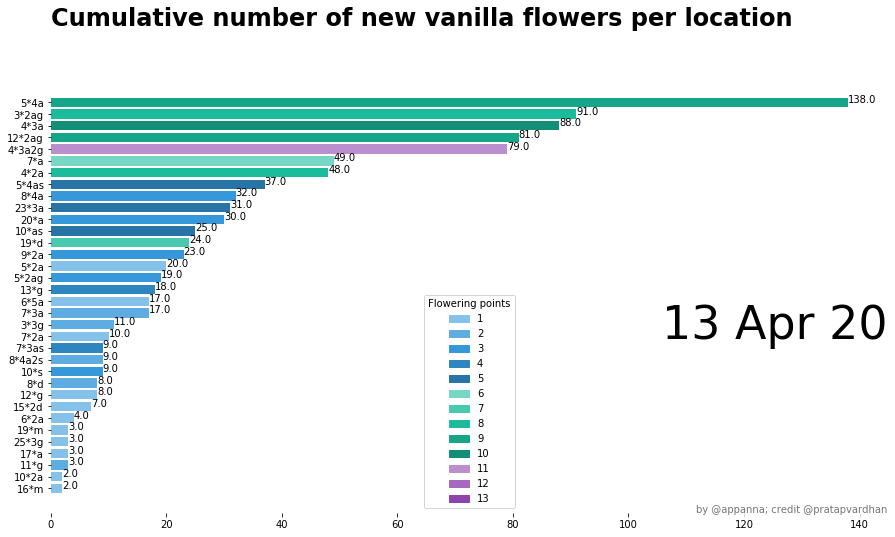

In [16]:
# Optimise table and pack into a function

fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(current_date):
    dff = (dfpf[dfpf['Date'].eq(current_date)]
       .sort_values(by='cum_sum', ascending=True))
    ax.clear()
    dff['color']=dff['Points_flowering'].apply(lambda x: colors[x])     
    ax.barh(dff['Location'], dff['cum_sum'], color=dff.color)
    dx = dff['cum_sum'].max() / 200
    for i, (value, name) in enumerate(zip(dff['cum_sum'], dff['Location'])):
        ax.text(value, i, value, ha='left') 
        #ax.text(value, i,     name,            ha='right')  # Tokyo: name
    # ... polished styles
    ax.text(0, 1.12, 'Cumulative number of new vanilla flowers per location',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @appanna; credit @pratapvardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    ax.text(1, 0.4, current_date, transform=ax.transAxes, size=46, ha='right')
    #ax.legend(colors)         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, loc='lower center', title='Flowering points')
    
draw_barchart('13 Apr 20')


In [17]:
f=dfpf['Date'].unique() #date range to consider for animation frames

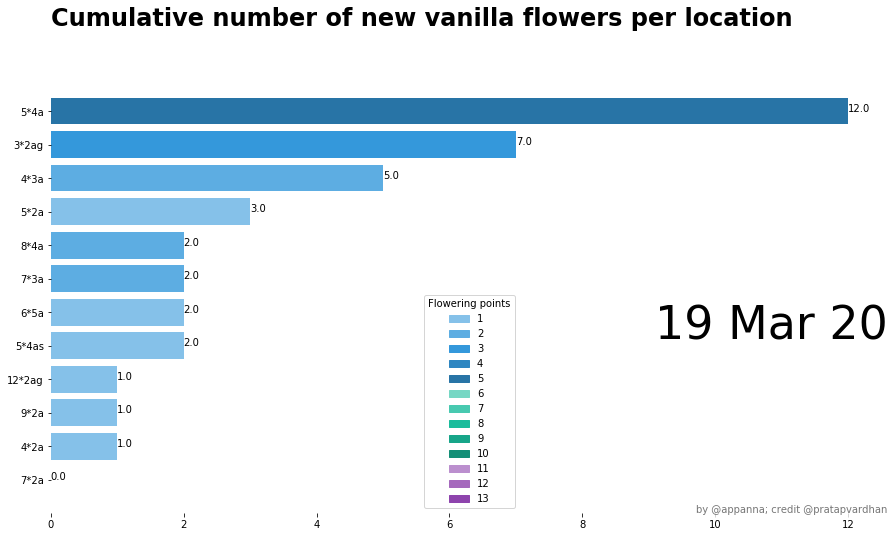

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=f)
#HTML(animator.to_jshtml()) 
#animator.to_html5_video() 
animator.save('Vanilla 2020.mp4',writer="ffmpeg", fps=2, bitrate=1800)